<a href="https://colab.research.google.com/github/AMIN-nsri/Candy-Crush/blob/main/hydrowizard_intelligent_fuzzy_logic_irrigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# prompt: i have to implement a fuzzy system. determine the membership function of fuzzy set for variables below:
# Soil moisture level: "Dry", "Medium", "Wet"
# Weather Condition: "Sunny", "Cloudy", "Rainy"
# Irrigation amount: "Zero water", "small", "medium", "large"

import numpy as np

# Soil Moisture Level
def soil_moisture_membership(soil_moisture_level):
    """
    Determines the membership function of the fuzzy set for soil moisture level.
    Args:
        soil_moisture_level (float): Soil moisture level (0-100)

    Returns:
        dict: Membership function values for Dry, Medium, and Wet
    """

    # Example using triangular membership functions (adjust parameters as needed)
    dry = 0
    medium = 0
    wet = 0

    if soil_moisture_level <= 20:
      dry = 1
    elif 20 <= soil_moisture_level <= 30:
      dry = (30 - soil_moisture_level) / 10

    if soil_moisture_level <= 20 or soil_moisture_level >= 80:
      medium = 0
    elif 20 < soil_moisture_level <= 40:
      medium = (soil_moisture_level - 20) / 20
    elif 30 <= soil_moisture_level <= 60:
      medium = 1
    if 30 <= soil_moisture_level <= 60:
      medium = np.minimum((soil_moisture_level - 20) / 40 , (80 - soil_moisture_level)/20)
    elif 60 <= soil_moisture_level <= 80:
        medium = (80-soil_moisture_level)/20

    if 65 <= soil_moisture_level:
        wet = (soil_moisture_level - 65) / 65

    return {"Dry": dry, "Medium": medium, "Wet": wet}



# Weather Condition
def weather_membership(weather_condition):
    """
    Determines the membership function of the fuzzy set for weather condition.
    Args:
        weather_condition (str): "Sunny", "Cloudy", or "Rainy"
    Returns:
        dict: Membership grades for Sunny, Cloudy, and Rainy
    """
    sunny = 0
    cloudy = 0
    rainy = 0

    if weather_condition == "Sunny":
        sunny = 1
    elif weather_condition == "Cloudy":
        cloudy = 1
    elif weather_condition == "Rainy":
        rainy = 1

    return {"Sunny": sunny, "Cloudy": cloudy, "Rainy": rainy}



# Irrigation Amount (Example using trapezoidal membership functions)
def irrigation_amount_membership(irrigation_amount):
    """
    Determines the membership grades of the fuzzy set for irrigation amount.
    Args:
        irrigation_amount: The irrigation amount (in liters, for example).

    Returns:
        dict: Membership grades for "Zero water", "small", "medium", and "large".
    """

    zero_water = 0
    small = 0
    medium = 0
    large = 0

    if 0 <= irrigation_amount <= 5:
        zero_water = 1
    elif 5 <= irrigation_amount <=15 :
        small = (irrigation_amount - 5) / 10
        zero_water = 1 - ((irrigation_amount -5)/10)
    elif 10 <= irrigation_amount <= 30:
        medium = (irrigation_amount - 10) / 20
        small = 1 - (irrigation_amount - 10)/20

    elif 25 <= irrigation_amount <= 40:
        large = (irrigation_amount - 25) / 15
        medium = 1 - (irrigation_amount -25)/15
    elif irrigation_amount > 40 :
      large = 1

    return {"Zero water": zero_water, "small": small, "medium": medium, "large": large}


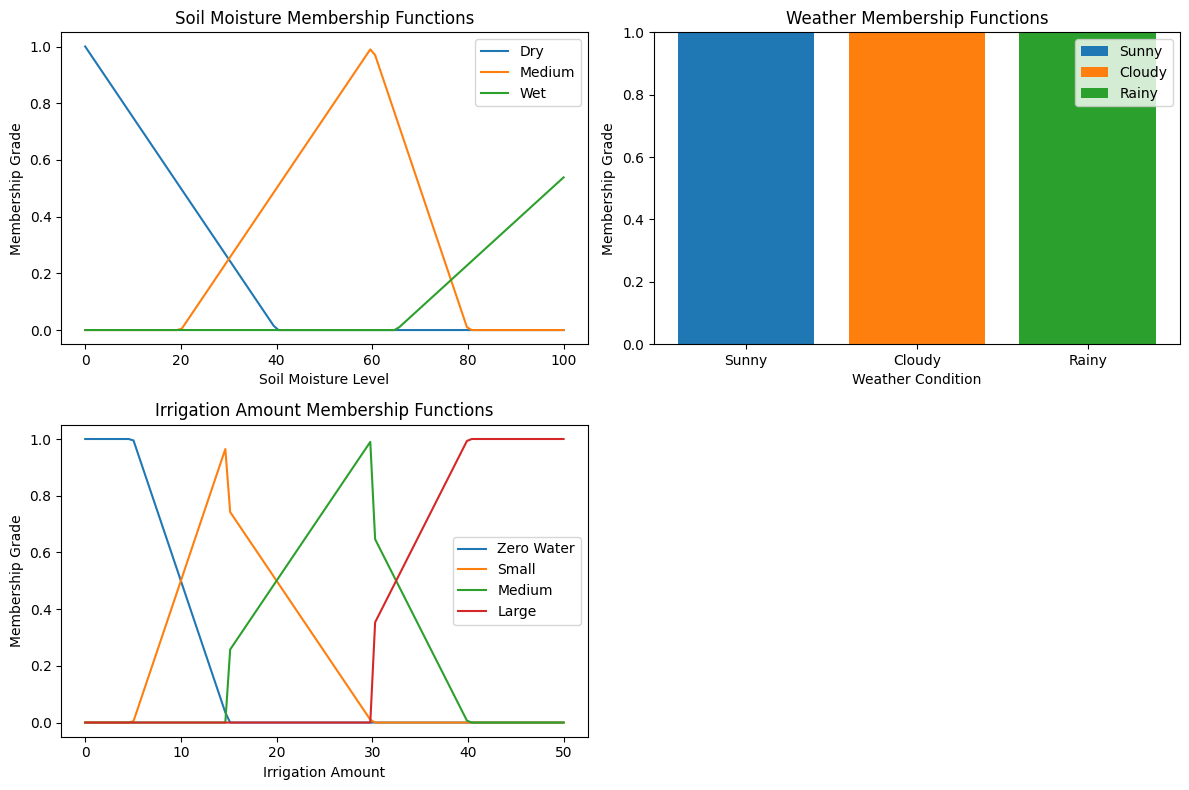

In [8]:
# prompt: show each of variables on the chart

import matplotlib.pyplot as plt
import numpy as np

# Generate x-values for plotting
soil_moisture_levels = np.linspace(0, 100, 100)  # Example range for soil moisture
irrigation_amounts = np.linspace(0, 50, 100)  # Example range for irrigation amount


# Create plots
plt.figure(figsize=(12, 8))

# Plot Soil Moisture Membership Functions
plt.subplot(2, 2, 1)
dry_membership = [soil_moisture_membership(level)["Dry"] for level in soil_moisture_levels]
medium_membership = [soil_moisture_membership(level)["Medium"] for level in soil_moisture_levels]
wet_membership = [soil_moisture_membership(level)["Wet"] for level in soil_moisture_levels]
plt.plot(soil_moisture_levels, dry_membership, label="Dry")
plt.plot(soil_moisture_levels, medium_membership, label="Medium")
plt.plot(soil_moisture_levels, wet_membership, label="Wet")
plt.xlabel("Soil Moisture Level")
plt.ylabel("Membership Grade")
plt.title("Soil Moisture Membership Functions")
plt.legend()


# Plot Weather Membership Functions (bar chart)
plt.subplot(2, 2, 2)
weather_conditions = ["Sunny", "Cloudy", "Rainy"]
weather_memberships = [weather_membership(condition) for condition in weather_conditions]

sunny_membership = [x["Sunny"] for x in weather_memberships]
cloudy_membership = [x["Cloudy"] for x in weather_memberships]
rainy_membership = [x["Rainy"] for x in weather_memberships]
plt.bar(weather_conditions, sunny_membership, label = 'Sunny')
plt.bar(weather_conditions, cloudy_membership, bottom=sunny_membership, label = 'Cloudy')
plt.bar(weather_conditions, rainy_membership, bottom = np.array(sunny_membership)+ np.array(cloudy_membership), label = 'Rainy')


plt.xlabel("Weather Condition")
plt.ylabel("Membership Grade")
plt.title("Weather Membership Functions")
plt.legend()



# Plot Irrigation Amount Membership Functions
plt.subplot(2, 2, 3)
zero_water_membership = [irrigation_amount_membership(amount)["Zero water"] for amount in irrigation_amounts]
small_membership = [irrigation_amount_membership(amount)["small"] for amount in irrigation_amounts]
medium_membership = [irrigation_amount_membership(amount)["medium"] for amount in irrigation_amounts]
large_membership = [irrigation_amount_membership(amount)["large"] for amount in irrigation_amounts]
plt.plot(irrigation_amounts, zero_water_membership, label="Zero Water")
plt.plot(irrigation_amounts, small_membership, label="Small")
plt.plot(irrigation_amounts, medium_membership, label="Medium")
plt.plot(irrigation_amounts, large_membership, label="Large")

plt.xlabel("Irrigation Amount")
plt.ylabel("Membership Grade")
plt.title("Irrigation Amount Membership Functions")
plt.legend()


plt.tight_layout()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 16.8 MB/s eta 0:00:00


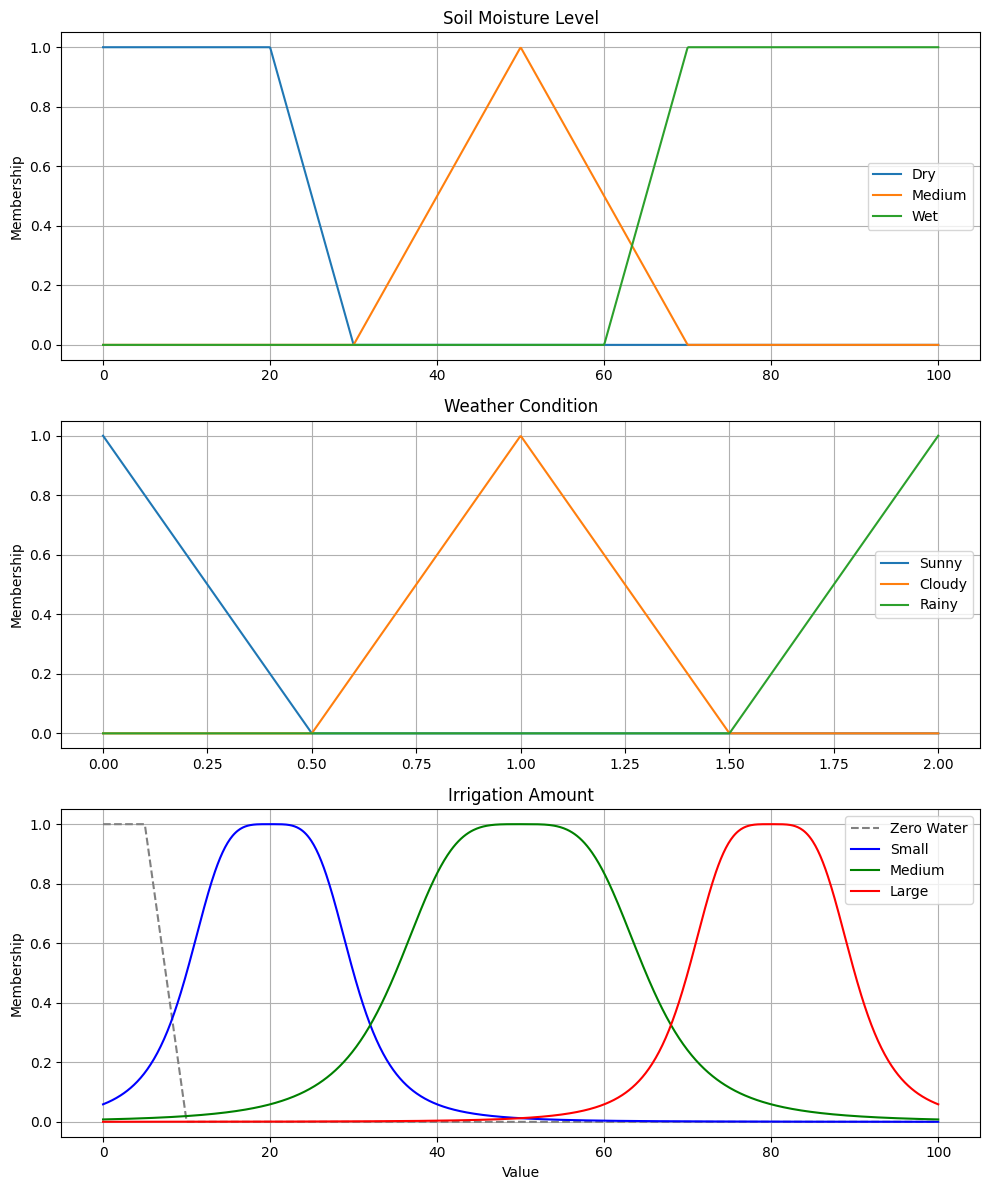

In [11]:
import numpy as np
!pip install scikit-fuzzy
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Define universes of discourse
soil_moisture = np.linspace(0, 100, 1000)    # 0: Dry → 100: Wet
weather = np.linspace(0, 2, 1000)            # 0: Sunny, 1: Cloudy, 2: Rainy
irrigation = np.linspace(0, 100, 1000)       # 0: Zero Water → 100: Max

# Soil Moisture Membership Functions
dry = fuzz.trapmf(soil_moisture, [0, 0, 20, 30])
medium = fuzz.trimf(soil_moisture, [30, 50, 70])
wet = fuzz.trapmf(soil_moisture, [60, 70, 100, 100])

# Weather Condition Membership Functions (fuzzy)
sunny = fuzz.trimf(weather, [-0.5, 0, 0.5])
cloudy = fuzz.trimf(weather, [0.5, 1, 1.5])
rainy = fuzz.trimf(weather, [1.5, 2, 2.5])

# Irrigation Amount Membership Functions
zero = fuzz.trapmf(irrigation, [0, 0, 5, 10])                      # Trapezoidal
small = fuzz.gbellmf(irrigation, a=10, b=2, c=20)                  # Bell-shaped
medium_irrig = fuzz.gbellmf(irrigation, a=15, b=2, c=50)
large = fuzz.gbellmf(irrigation, a=10, b=2, c=80)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot soil moisture
axs[0].plot(soil_moisture, dry, label='Dry')
axs[0].plot(soil_moisture, medium, label='Medium')
axs[0].plot(soil_moisture, wet, label='Wet')
axs[0].set_title('Soil Moisture Level')
axs[0].set_ylabel('Membership')
axs[0].legend()
axs[0].grid(True)

# Plot weather condition
axs[1].plot(weather, sunny, label='Sunny')
axs[1].plot(weather, cloudy, label='Cloudy')
axs[1].plot(weather, rainy, label='Rainy')
axs[1].set_title('Weather Condition')
axs[1].set_ylabel('Membership')
axs[1].legend()
axs[1].grid(True)

# Plot irrigation amount
axs[2].plot(irrigation, zero, label='Zero Water', linestyle='--', color='gray')
axs[2].plot(irrigation, small, label='Small', color='blue')
axs[2].plot(irrigation, medium_irrig, label='Medium', color='green')
axs[2].plot(irrigation, large, label='Large', color='red')
axs[2].set_title('Irrigation Amount')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Membership')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()
